## Setup mask_rcnn

In [1]:
!conda list cudnn
!conda list cudatoolkit
!conda list tensorflow-gpu


# packages in environment at C:\Users\P Dog\.conda\envs\gputest4:
#
# Name                    Version                   Build  Channel
# packages in environment at C:\Users\P Dog\.conda\envs\gputest4:
#
# Name                    Version                   Build  Channel
# packages in environment at C:\Users\P Dog\.conda\envs\gputest4:
#
# Name                    Version                   Build  Channel
tensorflow-gpu            2.3.0                    pypi_0    pypi
tensorflow-gpu-estimator  2.3.0                    pypi_0    pypi


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices()))
tf.config.list_physical_devices()

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
with tf.device('/device:XLA_GPU:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')

NameError: name 'tf' is not defined

In [1]:
from tensorflow.python.client import device_lib
print(tf.config.list_physical_devices())


NameError: name 'tf' is not defined

In [5]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
print(os.path.abspath("../"))
from pycocotools.coco import COCO
# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config

sys.path.append(os.path.join(ROOT_DIR, r"D:\Research\aktwelve_mask_rcnn\samples/"))  # To find local version


%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_chile_0015.h5")
# # Download COCO trained weights from Releases if needed
# if not os.path.exists(COCO_MODEL_PATH):
#     utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")


ModuleNotFoundError: No module named 'skimage'

In [6]:
#!/usr/bin/env python
# coding: utf-8

# # Mask R-CNN Demo
# 
# A quick intro to using the pre-trained model to detect and segment objects.

# In[18]:


import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, r"/content/Mask-RCNN-TF2/samples/coco/"))  # To find local version
import coco

get_ipython().run_line_magic('matplotlib', 'inline')

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "fruits-360")


# ## Configurations
# 
# We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.
# 
# For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

# In[12]:


class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


# ## Create Model and Load Trained Weights

# In[13]:


# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)


# ## Class Names
# 
# The model classifies objects and returns class IDs, which are integer value that identify each class. Some datasets assign integer values to their classes and some don't. For example, in the MS-COCO dataset, the 'person' class is 1 and 'teddy bear' is 88. The IDs are often sequential, but not always. The COCO dataset, for example, has classes associated with class IDs 70 and 72, but not 71.
# 
# To improve consistency, and to support training on data from multiple sources at the same time, our ```Dataset``` class assigns it's own sequential integer IDs to each class. For example, if you load the COCO dataset using our ```Dataset``` class, the 'person' class would get class ID = 1 (just like COCO) and the 'teddy bear' class is 78 (different from COCO). Keep that in mind when mapping class IDs to class names.
# 
# To get the list of class names, you'd load the dataset and then use the ```class_names``` property like this.
# ```
# # Load COCO dataset
# dataset = coco.CocoDataset()
# dataset.load_coco(COCO_DIR, "train")
# dataset.prepare()
# 
# # Print class names
# print(dataset.class_names)
# ```
# 
# We don't want to require you to download the COCO dataset just to run this demo, so we're including the list of class names below. The index of the class name in the list represent its ID (first class is 0, second is 1, third is 2, ...etc.)

# In[27]:


# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

Coordiante gar

In [7]:
def create_central_pixels(rois_array):
    center_pixels = []
    for rois in rois_array:
        center = list(np.abs([(rois[1]+(rois[3]-rois[1])/2).astype(np.int),(rois[0]+(rois[2]-rois[0])/2).astype(np.int)]))
        center_pixels.append(center)
    return center_pixels

def detect_people(new_image):
    results = model.detect([new_image], verbose=1)
    r = results[0]
    classes = r['class_ids']
    person = np.where(classes == 1)
    people_rois = r['rois'][person]
    center_pixels = create_central_pixels(people_rois)
    return center_pixels

In [1]:
import cv2
import numpy as np

def draw_map(floorplan,hall):
    total = hall[0]+hall[1]
    cv2.putText(floorplan, 'Total Number of Persons: {}'.format(total), (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.1, (0,0,255), 2)
    cv2.putText(floorplan, '{}'.format(hall[1]), (930, 350), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    cv2.putText(floorplan, '{}'.format(hall[0]), (1485, 350), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    cv2.circle(floorplan, (940, 375), 10, (0, 0,255), 20)
    cv2.circle(floorplan, (1495, 375), 10, (0, 0,255), 20)

def draw_concurrent_path(path,frame):
    for i in range(1,len(path)):
        cv2.line(frame,(path[i-1][0],path[i-1][1]),(path[i][0],path[i][1]),(0,255,0),5)
        
def draw_path(path,frame,b,g,r):
    
    for i in range(1,len(path)):
        cv2.line(frame,(path[i-1][0],path[i-1][1]),(path[i][0],path[i][1]),(int(b),int(g),int(r)),5)
        
def draw_boundry(frame,bound_lx,bound_ly,bound_rx, bound_ry):
    cv2.rectangle(frame, (bound_lx,bound_ly),  (bound_rx, bound_ry), (36,255,12), 3)
    cv2.putText(frame, 'Boundry', (bound_lx, bound_ly-20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)    
                
def process_image(frame1,frame2):
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (15,15), 5)
    _, thresh = cv2.threshold(blur, 15, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=10)
    return dilated

C:\Users\P Dog\.conda\envs\gputest\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\P Dog\.conda\envs\gputest\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\P Dog\.conda\envs\gputest\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [9]:
import cv2
import numpy as np

def draw_map(floorplan,hall):
    total = hall[0]+hall[1]
    cv2.putText(floorplan, 'Total Number of Persons: {}'.format(total), (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    cv2.putText(floorplan, '{}'.format(hall[1]), (930, 350), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    cv2.putText(floorplan, '{}'.format(hall[0]), (1485, 350), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    cv2.circle(floorplan, (940, 375), 10, (0, 0,255), 20)
    cv2.circle(floorplan, (1495, 375), 10, (0, 0,255), 20)

def draw_concurrent_path(path,frame):
    for i in range(1,len(path)):
        cv2.line(frame,(path[i-1][0],path[i-1][1]),(path[i][0],path[i][1]),(0,255,0),5)
        
def draw_path(path,frame,b,g,r):
    
    for i in range(1,len(path)):
        cv2.line(frame,(path[i-1][0],path[i-1][1]),(path[i][0],path[i][1]),(int(b),int(g),int(r)),5)
        
def draw_boundry(frame,bound_lx,bound_ly,bound_rx, bound_ry):
    cv2.rectangle(frame, (bound_lx,bound_ly),  (bound_rx, bound_ry), (36,255,12), 3)
    cv2.putText(frame, 'Boundry', (bound_lx, bound_ly-20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)    
                
def process_image(frame1,frame2):
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (15,15), 5)
    _, thresh = cv2.threshold(blur, 15, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=10)
    return dilated

Processing 1 images
image                    shape: (640, 425, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


C:\Users\P Dog\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


(-0.5, 424.5, 639.5, -0.5)

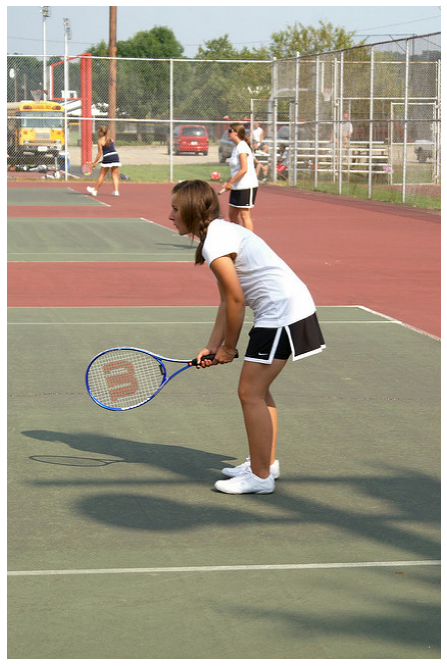

In [10]:
new_image = skimage.io.imread(r'C:\Users\P Dog\aktwelve_mask_rcnn\images\3862500489_6fd195d183_z.JPG')


# Visualize results
def detect_people(new_image):
    results = model.detect([new_image], verbose=1)
    r = results[0]
    classes = r['class_ids']
    person = np.where(classes == 1)
    people_rois = r['rois'][person]
    center_pixels = create_central_pixels(people_rois)
    return center_pixels
cord_array =detect_people(new_image)

# Visualize results


plt.figure(figsize=(20,12))
plt.imshow(new_image); plt.axis('off')   


## Test mask_rcnn

In [11]:
import pandas as pd

In [12]:
import csv 
filename = "F:\Thomas and Brown Data\coords csv\Coords of Goddard Annex SE Exit 11_2_2020 7 15 00 AM.csv"
coord_array = [ [],[],[[325,333]],[[330,470]],[[325,333],[400,500]] ]

frame_count_samp = [0,1,2,3,4]
coord_df = pd.DataFrame()


    
    


In [2]:
cap = cv2.VideoCapture('F:\Thomas and Brown Data\Goddard Annex SE Exit 11_2_2020 7 15 00 AM.avi')

#Grab first and second frame
ret, frame1 = cap.read()
ret, frame2 = cap.read()

frame_count = 0

with open(filename, 'w',newline='') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    while cap.isOpened():
        #Start Frame
        frame_count += 1


        #Display Images
        cord_array = detect_people(frame1)

        print(cord_array)
        if len(cord_array)>0:
            for cords in cord_array:
                cv2.circle(frame1, (cords),1,(255, 0, 255), 3)


        cv2.imshow("Live Feed", frame1.astype(np.uint8))


        #Reset frames
        frame1 = frame2 
    #     frame1 = cv2.GaussianBlur(frame1, (11,11), 5)
        ret, frame2 = cap.read()    
        row = [frame_count]
        for coord in cord_array:
            row += [coord]
        print(row)
        csvwriter.writerow(row) 
        if cv2.waitKey(40) == ord('q'):
            break

cv2.destroyAllWindows()
cap.release()


C:\Users\P Dog\.conda\envs\gputest\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\P Dog\.conda\envs\gputest\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\P Dog\.conda\envs\gputest\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


NameError: name 'filename' is not defined

## countour technique

In [ ]:
cap1 = cv2.VideoCapture('F:\Thomas and Brown Data\Goddard Annex NW Hall 11_2_2020 4 05 00 AM.avi')
cap = cv2.VideoCapture('F:\Thomas and Brown Data\Goddard Annex SE Exit 11_2_2020 7 15 00 AM.avi')


frame_width = int( cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height =int( cap.get( cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc('X','V','I','D')

out = cv2.VideoWriter("output.avi", fourcc, 5.0, (1280,720))

#Grab first and second frame
ret, frame1 = cap.read()
ret, frame2 = cap.read()

ret, frame1_cam2 = cap1.read()
ret, frame2_cam2 = cap1.read()

frame1_cam2 = cv2.resize(frame1_cam2,(np.shape(frame1)[1],np.shape(frame1)[0]))
frame2_cam2 = cv2.resize(frame2_cam2,(np.shape(frame1)[1],np.shape(frame1)[0]))

#Images
floorplan = cv2.imread(r'C:\Users\Paulito\Documents\Research\resources\goddard floor plan.png')
path_vis = np.zeros(frame1.shape).astype(np.uint8)


final_out = np.zeros((2*frame_height,frame_width,3))

#Establish Boundry
bound_lx=50
bound_ly=100
bound_rx=1800
bound_ry=1000

#Initalize Variables
feed_0_path = []
feed_1_path = []
frame_count = 0
frame_deta = 0
p_id = 0

line_vect_feed_0 = []
line_vect_feed_1 = []
color_vect = []

path_count = 0
person_count_feed_0 = 0
person_count_feed_1 = 0
bgr_mat = (255 * np.random.random_sample([100000,3])).astype(int)
frame_vector = [[frame1,frame2],[frame1_cam2,frame2_cam2]]

while cap.isOpened():
    #Start Frame
    frame_count += 1

    #Proccess Image
    dilated = process_image(frame1, frame2)
 
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    #Create Boundry
    draw_boundry(frame1, bound_lx, bound_ly, bound_rx, bound_ry) 
    
    #Reset Empty Flag
    empty_flag = True
    for person in contours:
        
        #Get Coords
        (x, y, w, h) = cv2.boundingRect(person)

        #Create boundry condition
        in_bound_l = (x+int(w/2)>bound_lx) & (y+int(h/2)-50>bound_ly)
        in_bound_r = (x+int(w/2)<bound_rx) & (y+int(h/2)-50<bound_ry)
        in_bound = in_bound_l & in_bound_r

        if in_bound:

            if (cv2.contourArea(person) > 10000 ):
                    
                #Reset flag and draw rectangle
                empty_flag = False
                cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2)
                       
                p_id = 0
                cv2.putText(frame1, 'Person ID: {} '.format(p_id), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
                    
                #Draw map and path

                draw_concurrent_path(feed_0_path, frame1)
                        
                feed_0_path.append([x+int(w/2)-50,y+int(h/2)-50])
    
    #See if path needs to be saved and reset                                     
    if empty_flag:
        if len(feed_0_path) > 30:
            b,g,r = bgr_mat[path_count]
            line_vect_feed_0+=[feed_0_path]
            color_vect+=[[b,g,r]]
            path_count += 1
            feed_0_path = [] 
            person_count_feed_0 = 0
    else:
        person_count_feed_0 = 1
        
    #Reset and keep path
    if len(line_vect_feed_0)>0:
        for p in range(len(line_vect_feed_0)):
            
            b,g,r = color_vect[p]
            draw_path(line_vect_feed_0[p], frame1,b,g,r)
            draw_path(line_vect_feed_0[p], path_vis,b,g,r)
            
            
            
    
            
            
###########

    #Proccess Image
    blur1 = cv2.GaussianBlur(frame1_cam2, (11,11), 5)
    blur2 = cv2.GaussianBlur(frame2_cam2, (11,11), 5)
    dilated = process_image(blur1, blur2)

 
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    #Create Boundry
    draw_boundry(frame1_cam2, bound_lx, bound_ly, bound_rx, bound_ry) 
    
    #Reset Empty Flag
    empty_flag = True
    for person in contours:

        #Get Coords
        (x, y, w, h) = cv2.boundingRect(person)

        #Create boundry condition
        in_bound_l = (x+int(w/2)>bound_lx) & (y+int(h/2)-50>bound_ly)
        in_bound_r = (x+int(w/2)<bound_rx) & (y+int(h/2)-50<bound_ry)
        in_bound = in_bound_l & in_bound_r

        if in_bound:

            if (cv2.contourArea(person) > 15000 ):
                    
                #Reset flag and draw rectangle
                empty_flag = False
                cv2.rectangle(frame1_cam2, (x, y), (x+w, y+h), (0, 255, 0), 2)
                       
                p_id = 1
                cv2.putText(frame1_cam2, 'Person ID: {} '.format(p_id), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
                    
                #Draw map and path

                draw_concurrent_path(feed_1_path, frame1_cam2)
                        
                feed_1_path.append([x+int(w/2)-50,y+int(h/2)-50])
    
    #See if path needs to be saved and reset                                     
    if empty_flag:
        if len(feed_1_path) > 10:
            b,g,r = bgr_mat[path_count]
            line_vect_feed_1+=[feed_1_path]
            color_vect+=[[b,g,r]]
            path_count += 1
            p_id = 1
            feed_1_path = []
            person_count_feed_1 = 0
    else:
        person_count_feed_1 = 1
        
    #Reset and keep path
    if len(line_vect_feed_1)>0:
        for p in range(len(line_vect_feed_1)):
            
            b,g,r = color_vect[p]
            draw_path(line_vect_feed_1[p], frame1_cam2,b,g,r)
            draw_path(line_vect_feed_1[p], path_vis,b,g,r)
            
    # Calculate Hall Data
    hall = [person_count_feed_0,person_count_feed_1]
    
            
        #Display Images
    
    final_out[0:frame_height,0:frame_width] = frame1
    final_out[frame_height:2*frame_height,0:frame_width] = frame1_cam2
    cv2.imshow("Live Feed", final_out.astype(np.uint8))
    floorplan = cv2.imread("F:\Thomas and Brown Data\goddard floor plan.png")
    draw_map(floorplan,hall)
    cv2.imshow("Floor Plan", floorplan)
    cv2.imshow("blur",blur1)

    
    
    #Reset frames
    frame1 = frame2 
    frame1_cam2 = frame2_cam2
        
        
    ret, frame2 = cap.read()
    ret, frame2_cam2 = cap1.read()
    frame2_cam2 = cv2.resize(frame2_cam2,(np.shape(frame2)[1],np.shape(frame2)[0]))
    
    frame_vector = [[frame1,frame2],[frame1_cam2,frame2_cam2]]
        
    if cv2.waitKey(40) == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()
out.release()



In [ ]:
cap1 = cv2.VideoCapture('F:\Thomas and Brown Data\Goddard Annex NW Hall 11_2_2020 4 05 00 AM.avi')
cap = cv2.VideoCapture('F:\Thomas and Brown Data\Goddard Annex SE Exit 11_2_2020 7 15 00 AM.avi')


frame_width = int( cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height =int( cap.get( cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc('X','V','I','D')

out = cv2.VideoWriter("output.avi", fourcc, 5.0, (1280,720))

#Grab first and second frame
ret, frame1 = cap.read()
ret, frame2 = cap.read()

ret, frame1_cam2 = cap1.read()
ret, frame2_cam2 = cap1.read()

frame1_cam2 = cv2.resize(frame1_cam2,(np.shape(frame1)[1],np.shape(frame1)[0]))
frame2_cam2 = cv2.resize(frame2_cam2,(np.shape(frame1)[1],np.shape(frame1)[0]))

#Images
floorplan = cv2.imread(r'C:\Users\Paulito\Documents\Research\resources\goddard floor plan.png')
path_vis = np.zeros(frame1.shape).astype(np.uint8)


final_out = np.zeros((2*frame_height,frame_width,3))

#Establish Boundry
bound_lx=50
bound_ly=100
bound_rx=1800
bound_ry=1000

#Initalize Variables
feed_0_path = []
feed_1_path = []
frame_count = 0
frame_deta = 0
p_id = 0

line_vect_feed_0 = []
line_vect_feed_1 = []
color_vect = []

path_count = 0
person_count_feed_0 = 0
person_count_feed_1 = 0
bgr_mat = (255 * np.random.random_sample([100000,3])).astype(int)
frame_vector = [[frame1,frame2],[frame1_cam2,frame2_cam2]]

while cap.isOpened():
    #Start Frame
    frame_count += 1

    #Proccess Image
    dilated = process_image(frame1, frame2)
 
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    #Create Boundry
    draw_boundry(frame1, bound_lx, bound_ly, bound_rx, bound_ry) 
    
    #Reset Empty Flag
    empty_flag = True
    people_coords = detect_people(new_image)
    
#     for person in people_coords:
        
# #         #Get Coords
# #         (x, y, w, h) = cv2.boundingRect(person)

# #         #Create boundry condition
# #         in_bound_l = (x+int(w/2)>bound_lx) & (y+int(h/2)-50>bound_ly)
# #         in_bound_r = (x+int(w/2)<bound_rx) & (y+int(h/2)-50<bound_ry)
# #         in_bound = in_bound_l & in_bound_r

# #         if in_bound:

                    
#             #Reset flag and draw rectangle
#         empty_flag = False
#         cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2)
                       
#         p_id = 0
#         cv2.putText(frame1, 'Person ID: {} '.format(p_id), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
                    
#             #Draw map and path

    draw_concurrent_path(feed_0_path, frame1)
                        
    feed_0_path.append([people_coords])
    
    #See if path needs to be saved and reset                                     
    if empty_flag:
        if len(feed_0_path) > 30:
            b,g,r = bgr_mat[path_count]
            line_vect_feed_0+=[feed_0_path]
            color_vect+=[[b,g,r]]
            path_count += 1
            feed_0_path = [] 
            person_count_feed_0 = 0
    else:
        person_count_feed_0 = 1
        
    #Reset and keep path
    if len(line_vect_feed_0)>0:
        for p in range(len(line_vect_feed_0)):
            
            b,g,r = color_vect[p]
            draw_path(line_vect_feed_0[p], frame1,b,g,r)
            draw_path(line_vect_feed_0[p], path_vis,b,g,r)
            
            
            
    
            
            
###########

    #Proccess Image
    blur1 = cv2.GaussianBlur(frame1_cam2, (11,11), 5)
    blur2 = cv2.GaussianBlur(frame2_cam2, (11,11), 5)
    dilated = process_image(blur1, blur2)

 
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    #Create Boundry
    draw_boundry(frame1_cam2, bound_lx, bound_ly, bound_rx, bound_ry) 
    
    #Reset Empty Flag
    empty_flag = True
    for person in contours:

        #Get Coords
        (x, y, w, h) = cv2.boundingRect(person)

        #Create boundry condition
        in_bound_l = (x+int(w/2)>bound_lx) & (y+int(h/2)-50>bound_ly)
        in_bound_r = (x+int(w/2)<bound_rx) & (y+int(h/2)-50<bound_ry)
        in_bound = in_bound_l & in_bound_r

        if in_bound:

            if (cv2.contourArea(person) > 15000 ):
                    
                #Reset flag and draw rectangle
                empty_flag = False
                cv2.rectangle(frame1_cam2, (x, y), (x+w, y+h), (0, 255, 0), 2)
                       
                p_id = 1
                cv2.putText(frame1_cam2, 'Person ID: {} '.format(p_id), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
                    
                #Draw map and path

                draw_concurrent_path(feed_1_path, frame1_cam2)
                        
                feed_1_path.append([x+int(w/2)-50,y+int(h/2)-50])
    
    #See if path needs to be saved and reset                                     
    if empty_flag:
        if len(feed_1_path) > 10:
            b,g,r = bgr_mat[path_count]
            line_vect_feed_1+=[feed_1_path]
            color_vect+=[[b,g,r]]
            path_count += 1
            p_id = 1
            feed_1_path = []
            person_count_feed_1 = 0
    else:
        person_count_feed_1 = 1
        
    #Reset and keep path
    if len(line_vect_feed_1)>0:
        for p in range(len(line_vect_feed_1)):
            
            b,g,r = color_vect[p]
            draw_path(line_vect_feed_1[p], frame1_cam2,b,g,r)
            draw_path(line_vect_feed_1[p], path_vis,b,g,r)
            
    # Calculate Hall Data
    hall = [person_count_feed_0,person_count_feed_1]
    
            
        #Display Images
    
    final_out[0:frame_height,0:frame_width] = frame1
    final_out[frame_height:2*frame_height,0:frame_width] = frame1_cam2
    cv2.imshow("Live Feed", final_out.astype(np.uint8))
    floorplan = cv2.imread("F:\Thomas and Brown Data\goddard floor plan.png")
    draw_map(floorplan,hall)
    cv2.imshow("Floor Plan", floorplan)
    cv2.imshow("blur",blur1)

    
    
    #Reset frames
    frame1 = frame2 
    frame1_cam2 = frame2_cam2
        
        
    ret, frame2 = cap.read()
    ret, frame2_cam2 = cap1.read()
    frame2_cam2 = cv2.resize(frame2_cam2,(np.shape(frame2)[1],np.shape(frame2)[0]))
    
    frame_vector = [[frame1,frame2],[frame1_cam2,frame2_cam2]]
        
    if cv2.waitKey(40) == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()
out.release()



In [ ]:
# feed0 = cv2.VideoCapture('F:\Thomas and Brown Data\Goddard Annex SE Exit 11_2_2020 7 15 00 AM.avi')
# feeds = [
    
#     feed0
    
#      ]

# #Grab first frames
# first_frames = []
# second_frames = []

# feed_number = 0

# for feed in feeds:
#     __, first_frame =  feed.read()
#     __, second_frame = feed.read()
#     first_frames += [ first_frame ]
#     second_frames += [second_frame]

# frame_count = 0
# while feeds[0].isOpened():
#     #Start Frame
#     frame_count += 1
    
#     print(np.shape(first_frames))
# #     cv2.imshow("Live Feed", first_frames[0].astype(np.uint8))
        

#     #Reset frames
#     frame_index = 0
#     for second_frame in second_frames:
    
#         first_frames[frame_index] = second_frame
        
#         frame_index += 1
        
#     #Capture Next Frame
#     frame_index = 0
#     for feed in feeds:
    
#         second_frames[frame_index] = feed.read()
        
#         frame_index += 1
#     print(np.shape(second_frames))
        
#     if cv2.waitKey(40) == ord('q'):
#         break
        

# cv2.destroyAllWindows()
# feed.release()
# out.release()
